# INSTALL KAGGLE PACKAGE TO LOAD IMAGES DIRECTLY

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vagadro","key":"2dad87d4674deb719c3e3e6d1dc6431a"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

# DOWNLOAD STATE FARM DISTRACTED DRIVER DATASET FOR KAGGLE

In [ ]:
!kaggle competitions download -c state-farm-distracted-driver-detection

100% 3.99G/4.00G [01:24<00:00, 45.0MB/s]
100% 4.00G/4.00G [01:25<00:00, 50.5MB/s]


In [ ]:
! unzip state-farm-distracted-driver-detection

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  inflating: imgs/train/c7/img_57559.jpg  
  infla

since data has been downloaded we will start preprocessing and building models 

# LOAD PACKAGES

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import dask.bag as db
from dask import diagnostics
from PIL import Image
from PIL import Image
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import Input,Lambda, Dense,Flatten,Activation,Dropout,MaxPooling2D,Conv2D
import tensorflow as tf
from keras.models import Sequential
from glob import glob
from keras import backend as K

In [ ]:
train_path="/content/imgs/train"
test_path="/content/imgs/test"

check random image to see if data is loading correctly


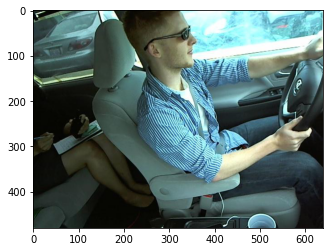

In [ ]:
img=load_img("/content/imgs/train/c0/img_100026.jpg")
plt.imshow(img)
plt.axis('on')
plt.show()

# IMAGE AUGMENTATION2- IMAGE RESIZING ONLY

In [ ]:
img_height, img_width = 64, 64
batch_size=40

datagen2 = ImageDataGenerator(
    preprocessing_function = lambda x: x.astype('float32')/255 - 0.5, 
    validation_split=0.2)

train_datagen_simple = datagen2.flow_from_directory(
    train_path, target_size=(img_height, img_width), 
    batch_size=batch_size, class_mode='categorical', subset='training')

validation_datagen_simple = datagen2.flow_from_directory(
    train_path, target_size=(img_height, img_width), 
    batch_size=batch_size, class_mode='categorical', subset='validation')


if K.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)

else:
  input_shape=(img_width,img_height,3)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


# MODEL 4- SIMPLE CNN ON SIMPLE DATAGEN DATA (with no augmentation)

In [ ]:
model4 = Sequential()
model4.add(Conv2D(
  filters=32, kernel_size=3, padding='same', activation='relu', 
  input_shape=(64,64,3), kernel_initializer='glorot_normal'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=64, kernel_size=3, padding='same', 
                 activation='relu', kernel_initializer='glorot_normal'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=128, kernel_size=3, padding='same', 
                 activation='relu', kernel_initializer='glorot_normal'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Conv2D(filters=256, kernel_size=3, padding='same', 
                 activation='relu', kernel_initializer='glorot_normal'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(256, activation='relu', kernel_initializer='glorot_normal'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [ ]:
# Compile on Simple Datagen Data

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history4 = model4.fit(
    x=train_datagen_simple,
    validation_data=validation_datagen_simple,
    epochs=40,
    batch_size=batch_size)

Epoch 1/40
449/449 [==============================] - 95s 211ms/step - loss: 0.2370 - accuracy: 0.9287 - val_loss: 0.1025 - val_accuracy: 0.9730
Epoch 2/40
449/449 [==============================] - 95s 211ms/step - loss: 0.1284 - accuracy: 0.9609 - val_loss: 0.0800 - val_accuracy: 0.9790
Epoch 3/40
449/449 [==============================] - 94s 209ms/step - loss: 0.0906 - accuracy: 0.9720 - val_loss: 0.0498 - val_accuracy: 0.9873
Epoch 4/40
449/449 [==============================] - 95s 211ms/step - loss: 0.0660 - accuracy: 0.9800 - val_loss: 0.0630 - val_accuracy: 0.9799
Epoch 5/40
449/449 [==============================] - 95s 211ms/step - loss: 0.0620 - accuracy: 0.9787 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 6/40
449/449 [==============================] - 94s 209ms/step - loss: 0.0450 - accuracy: 0.9859 - val_loss: 0.0337 - val_accuracy: 0.9911
Epoch 7/40
449/449 [==============================] - 94s 210ms/step - loss: 0.0508 - accuracy: 0.9836 - val_loss: 0.0320 - val_ac

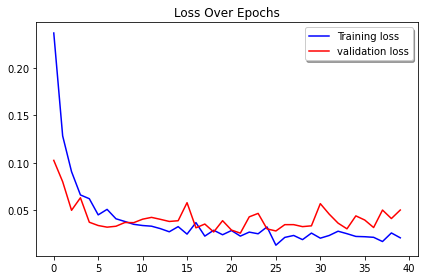

In [ ]:
plt.plot(model_history4.history['loss'], color='b', label="Training loss")
plt.plot(model_history4.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.title('Loss Over Epochs')
plt.tight_layout()
plt.show()

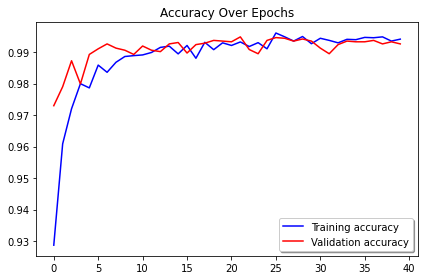

In [ ]:
plt.plot(model_history4.history['accuracy'], color='b', label="Training accuracy")
plt.plot(model_history4.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.title('Accuracy Over Epochs')
plt.tight_layout()
plt.show()

# SAVING THE MODEL

In [ ]:
from tensorflow.keras.models import load_model
import pickle
model4.save('model_cnn.h5')

In [ ]:
loaded_model=load_model('model_cnn.h5')


# Predictions

In [ ]:
import cv2

## 1) First Prediction

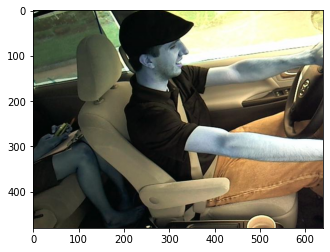

In [ ]:
test_img1 = cv2.imread('/content/imgs/test/img_10.jpg')
plt.imshow(test_img1)

In [ ]:
test_img1 = cv2.resize(test_img1,(64,64))
test_input1 = test_img1.reshape((1,64,64,3))
class_names= ["SAFE_DRIVING",
"TEXTING_RIGHT",
"TALKING_PHONE_RIGHT",
"TEXTING_LEFT",
"TALKING_PHONE_LEFT",
"OPERATING_RADIO",
"DRINKING",
"REACHING_BEHIND",
"HAIR_AND_MAKEUP",
"TALKING_TO_PASSENGER"
    
]
predictions=loaded_model.predict(test_input1)
scores=tf.nn.softmax(predictions[0])
scores=scores.numpy()
image_class=class_names[np.argmax(scores)]
print("The image uploaded is: {}".format(image_class))


The image uploaded is: OPERATING_RADIO


## 2nd Prediction

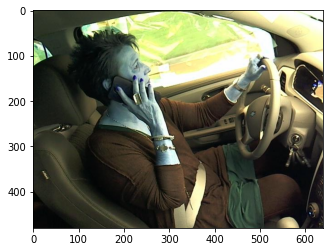

In [ ]:
test_img = cv2.imread('/content/imgs/test/img_100010.jpg')
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(64,64))
test_input = test_img.reshape((1,64,64,3))

class_names= ["SAFE_DRIVING",
"TEXTING_RIGHT",
"TALKING_PHONE_RIGHT",
"TEXTING_LEFT",
"TALKING_PHONE_LEFT",
"OPERATING_RADIO",
"DRINKING",
"REACHING_BEHIND",
"HAIR_AND_MAKEUP",
"TALKING_TO_PASSENGER"
    
]
predictions=loaded_model.predict(test_input)
scores=tf.nn.softmax(predictions[0])
scores=scores.numpy()
image_class=class_names[np.argmax(scores)]
print("The image uploaded is: {}".format(image_class))


The image uploaded is: TALKING_TO_PASSENGER


## 3rd Prediction

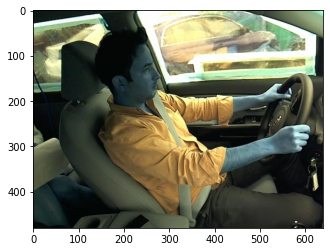

In [ ]:
test_img = cv2.imread('/content/imgs/test/img_100166.jpg')
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(64,64))
test_input = test_img.reshape((1,64,64,3))

class_names= ["SAFE_DRIVING",
"TEXTING_RIGHT",
"TALKING_PHONE_RIGHT",
"TEXTING_LEFT",
"TALKING_PHONE_LEFT",
"OPERATING_RADIO",
"DRINKING",
"REACHING_BEHIND",
"HAIR_AND_MAKEUP",
"TALKING_TO_PASSENGER"
    
]
predictions=loaded_model.predict(test_input)
scores=tf.nn.softmax(predictions[0])
scores=scores.numpy()
image_class=class_names[np.argmax(scores)]
print("The image uploaded is: {}".format(image_class))


The image uploaded is: TALKING_TO_PASSENGER


## 4th Prediction

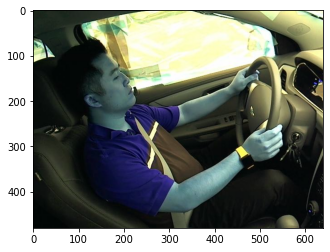

In [ ]:
test_img = cv2.imread('/content/imgs/train/c0/img_101223.jpg')
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(64,64))
test_input = test_img.reshape((1,64,64,3))

class_names= ["SAFE_DRIVING",
"TEXTING_RIGHT",
"TALKING_PHONE_RIGHT",
"TEXTING_LEFT",
"TALKING_PHONE_LEFT",
"OPERATING_RADIO",
"DRINKING",
"REACHING_BEHIND",
"HAIR_AND_MAKEUP",
"TALKING_TO_PASSENGER"
    
]
predictions=loaded_model.predict(test_input)
scores=tf.nn.softmax(predictions[0])
scores=scores.numpy()
image_class=class_names[np.argmax(scores)]
print("The image uploaded is: {}".format(image_class))

The image uploaded is: SAFE_DRIVING


# Save In a Pickle File

In [ ]:
import pickle

pickle.dump(model4,open('final_model.pkl','wb'))

# Deploying on Web App

In [ ]:
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 47.9 MB/s 
     |████████████████████████████████| 4.7 MB 7.6 MB/s 
     |████████████████████████████████| 78 kB 9.1 MB/s 
     |████████████████████████████████| 237 kB 77.1 MB/s 
     |████████████████████████████████| 181 kB 61.9 MB/s 
     |████████████████████████████████| 164 kB 72.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=912014f0e9b0c1ff67035fabbdee3d63c76c6ce6521488b20641670e2040cdad
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
%%writefile app.py

import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
import tensorflow
import cv2
import subprocess
import sys
import tensorflow_hub as hub

def install(package):
    subprocess.check_call([sys.executable,"-m","pip","install",package])

install('simplemma==0.5.0')

st.title('Safe/Unsafe Driving Prediction on the basis of Drivers Action')
st.markdown('This Project is built as part of University of Hyderabads Machine Learning and Applied AI course')
st.markdown('Built by Deepak Rawat- vagadro@gmail.com')

def main():
    file_uploaded=st.file_uploader("Upload the Image",type=['jpg','png','jpeg'])
    if file_uploaded is not None:
        image=Image.open(file_uploaded)
        figure=plt.figure()
        plt.imshow(image)
        plt.axis('off')
        result= predict_class(image)
        st.write(result)
        st.pyplot(figure)

def predict_class(image):
    classifier_model= tensorflow.keras.models.load_model('model_cnn.h5')
    shape=((64,64,3))
    model=tensorflow.keras.Sequential([hub.KerasLayer(classifier_model, input_shape=shape)])
    test_image=image.resize((64,64))
    test_image=tensorflow.keras.preprocessing.image.img_to_array(test_image)
    test_image=test_image/255.0
    test_image=np.expand_dims(test_image, axis=0)

#    test_image = cv2.resize(image, (64, 64))
#    test_input = test_image.reshape((1, 64, 64, 3))
    class_names = ["SAFE_DRIVING",
                   "TEXTING_RIGHT",
                   "TALKING_PHONE_RIGHT",
                   "TEXTING_LEFT",
                   "TALKING_PHONE_LEFT",
                   "OPERATING_RADIO",
                   "DRINKING",
                   "REACHING_BEHIND",
                   "HAIR_AND_MAKEUP",
                   "TALKING_TO_PASSENGER"
                   ]
    predictions = model.predict(test_image)
    scores = tensorflow.nn.softmax(predictions[0])
    scores = scores.numpy()
    image_class = class_names[np.argmax(scores)]
    result= "The Driver is: {}".format(image_class)
    return result

if __name__=='__main__':
    main()



Overwriting app.py
